In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset
waldo_dirs = [
    r'/Users/Katy/darknet/data/images/train-images/64/waldo',
    r'/Users/Katy/darknet/data/images/train-images/64-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/64-gray/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128-gray/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256-gray/waldo',
]

notwaldo_dirs = [
    r'/Users/Katy/darknet/data/images/train-images/64/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/64-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/64-gray/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128-gray/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256-gray/notwaldo',
]


In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Directories
waldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/allimages/waldo'
notwaldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/allimages/notwaldo'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64',  # Base directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64',  # Base directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 4302 images belonging to 2 classes.
Found 1074 images belonging to 2 classes.


In [2]:
# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Wally or not
])

In [3]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=3  # Adjust the number of epochs based on your data
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

Epoch 1/3
134/134 [==============================] - 25s 175ms/step - loss: 0.0769 - accuracy: 0.9906 - val_loss: 0.0404 - val_accuracy: 0.9934
Epoch 2/3
134/134 [==============================] - 20s 151ms/step - loss: 0.0521 - accuracy: 0.9927 - val_loss: 0.0461 - val_accuracy: 0.9934
Epoch 3/3
34/34 [==============================] - 2s 66ms/step - loss: 0.3286 - accuracy: 0.9935
Test accuracy: 0.99


find waldo

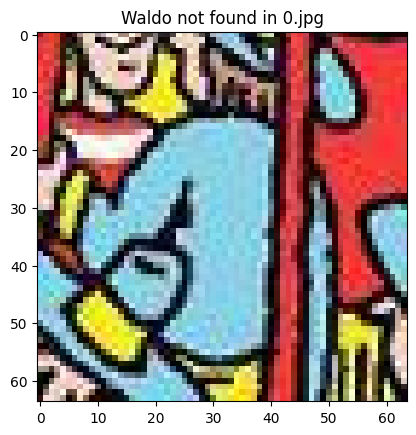

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the model
#model = ...  # Assume the model is already built and trained

# Function to preprocess image
def preprocess_image(image, target_size=(64, 64)):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

# Function to perform sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Path to original images
original_images_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images'
image_files = [os.path.join(original_images_path, f) for f in os.listdir(original_images_path) if f.endswith('.jpg')]

# Parameters for sliding window
window_size = (64, 64)
step_size = 64

# # Process each image
# for image_file in image_files:
#     image = cv2.imread(image_file)
#     orig_image = image.copy()
#     boxes = []
#     scores = []

#     for (x, y, window) in sliding_window(image, step_size, window_size):
#         if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
#             continue
        
#         window_image = preprocess_image(window)
#         pred = model.predict(window_image)[0][0]
        
#         if pred > 0.5:  # Threshold for detecting Waldo
#             boxes.append((x, y, x + window_size[0], y + window_size[1]))
#             scores.append(pred)
    
#     # If boxes are detected, select the best one
#     if boxes:
#         max_idx = np.argmax(scores)
#         (startX, startY, endX, endY) = boxes[max_idx]
#         cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo found in {os.path.basename(image_file)}')
#         plt.show()
#     else:
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo not found in {os.path.basename(image_file)}')
#         plt.show()

image_file = image_files[0]
image = cv2.imread(image_file)
orig_image = image.copy()
boxes = []
scores = []

for (x, y, window) in sliding_window(image, step_size, window_size):
    print(window)
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue
        
    window_image = preprocess_image(window)
    pred = model.predict(window_image)[0][0]
        
    if pred > 0.5:  # Threshold for detecting Waldo
        boxes.append((x, y, x + window_size[0], y + window_size[1]))
        scores.append(pred)
    
    # If boxes are detected, select the best one
if boxes:
    max_idx = np.argmax(scores)
    (startX, startY, endX, endY) = boxes[max_idx]
    cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo found in {os.path.basename(image_file)}')
    plt.show()
else:
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo not found in {os.path.basename(image_file)}')
    plt.show()


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize the image to match training size
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (rescale)
    return img_array

# Path to the image you want to classify
img_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images/0.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Since the output layer has a sigmoid activation, the prediction will be a probability
# Convert probability to binary classification (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

# Print the result
if predicted_class == 1:
    print("The image is classified as Wally.")
else:
    print("The image is classified as Not Wally.")


1/1 [==============================] - 0s 116ms/step
The image is classified as Not Wally.


In [51]:
print(prediction)

[[5.8775757e-31]]


In [46]:


# Function to preprocess image
def preprocess_image(image, target_size=(64, 64)):
    # Ensure image is in RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize the image
    image = cv2.resize(image, target_size)
    # Convert to array and normalize
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

# Test with an image from the training data
image_file = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64/waldo/original-images/0.jpg'  # Update with a valid image path from your training data
image = cv2.imread(image_file)

preprocessed_image = preprocess_image(image)
prediction = model.predict(preprocessed_image)
print(f'Prediction: {prediction}')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [45]:
model.predict(preprocess_image(image))

1/1 [==============================] - 0s 133ms/step


array([[0.]], dtype=float32)

In [25]:
image_file

'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images\\0.jpg'

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)


def preprocess_image(image, target_size=(64, 64)):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    #image = np.expand_dims(image, axis=0) / 255.0
    return image

In [24]:
def resize_image(image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    return resized_image


image_file = preprocess_image(image_file)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [20]:
model.predict(image_file)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\josel\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\josel\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\josel\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\josel\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\josel\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\josel\AppData\Local\Temp\ipykernel_15312\3544940738.py", line 1, in <module>
      model.predict(image_file)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
      return self(x, training=False)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "c:\Users\josel\anaconda3\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [32,64,3]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_754421]

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Directories
waldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/allimages/waldo'
notwaldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/allimages/notwaldo'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64',  # Base directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64',  # Base directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Enhanced Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Wally or not
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model with more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=1  # Increase the number of epochs
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Save the Model
model.save('wally_notwally_model.h5')


Found 4302 images belonging to 2 classes.
Found 1074 images belonging to 2 classes.
34/34 [==============================] - 41s 1s/step - loss: 0.0546 - accuracy: 0.9935
Test accuracy: 0.99


c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('wally_notwally_model.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize the image to match training size
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (rescale)
    return img_array

# Path to the image you want to classify
img_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images/0.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Since the output layer has a sigmoid activation, the prediction will be a probability
# Convert probability to binary classification (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

# Print the result
if predicted_class == 1:
    print("The image is classified as Wally.")
else:
    print("The image is classified as Not Wally.")


1/1 [==============================] - 0s 489ms/step
The image is classified as Not Wally.


## the following model doesn't modify waldo's


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Directories
#waldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64/waldo'
#notwaldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64/notwaldo'

waldo_dirs = [
    r'/Users/Katy/darknet/data/images/train-images/64/waldo',
    r'/Users/Katy/darknet/data/images/train-images/64-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/64-gray/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/128-gray/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256-bw/waldo',
    r'/Users/Katy/darknet/data/images/train-images/256-gray/waldo'
]

notwaldo_dirs = [
    r'/Users/Katy/darknet/data/images/train-images/64/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/64-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/64-gray/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/128-gray/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256-bw/notwaldo',
    r'/Users/Katy/darknet/data/images/train-images/256-gray/notwaldo'
]

# Function to load and preprocess images
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = image.load_img(img_path, target_size=(64, 64))  # Resize the image
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load and preprocess images for not Waldo
waldo_images = []
waldo_labels = []
for waldo_dir in waldo_dirs:
    w_images, w_labels = load_images_from_directory(waldo_dir, 1)  # Label 0 for not Waldo
    waldo_images.extend(w_images)
    waldo_labels.extend(w_labels)

# Load and preprocess images for not Waldo
notwaldo_images = []
notwaldo_labels = []
for notwaldo_dir in notwaldo_dirs:
    nw_images, nw_labels = load_images_from_directory(notwaldo_dir, 0)  # Label 0 for not Waldo
    notwaldo_images.extend(nw_images)
    notwaldo_labels.extend(nw_labels)

#waldo_images, waldo_labels = load_images_from_directory(waldo_dir, 1)
#notwaldo_images, notwaldo_labels = load_images_from_directory(notwaldo_dir, 0)

# Combine and convert to numpy arrays
waldo_images = np.array(waldo_images)
waldo_labels = np.array(waldo_labels)
notwaldo_images = np.array(notwaldo_images)
notwaldo_labels = np.array(notwaldo_labels)



# Balance the dataset by undersampling the not Wally category
from sklearn.utils import resample

# Determine the number of Wally images
n_waldo = 3*len(waldo_images)

# Undersample the Not Wally images
notwaldo_images_resampled, notwaldo_labels_resampled = resample(
    notwaldo_images,
    notwaldo_labels,
    replace=False,  # Do not sample with replacement
    n_samples=n_waldo,  # Match the number of Wally images
    random_state=42
)

# Combine the balanced dataset
all_images = np.concatenate((waldo_images, notwaldo_images_resampled))
all_labels = np.concatenate((waldo_labels, notwaldo_labels_resampled))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import numpy as np

# Model Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Wally or not
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ModelCheckpoint callback to save the best model based on validation accuracy
#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
checkpoint = ModelCheckpoint('best_model2.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the Model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Load the best model
best_model = tf.keras.models.load_model('best_model2.keras')

# Evaluate the Model
test_loss, test_accuracy = best_model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_accuracy:.2f}')

# Predict using the best model
y_pred = (best_model.predict(X_val) > 0.5).astype('int32')

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Epoch 1/200


/Users/Katy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 01:15:37.948257: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-22 01:15:37.948286: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-22 01:15:37.948292: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-22 01:15:37.948313: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-22 01:15:37.948329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7024 - loss: 0.8345 - val_accuracy: 0.7629 - val_loss: 0.7311
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7423 - loss: 0.7170 - val_accuracy: 0.7629 - val_loss: 0.6787
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7457 - loss: 0.6618 - val_accuracy: 0.7629 - val_loss: 0.6479
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7354 - loss: 0.6428 - val_accuracy: 0.7629 - val_loss: 0.5971
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7516 - loss: 0.6081 - val_accuracy: 0.7629 - val_loss: 0.6141
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7360 - loss: 0.6099 - val_accuracy: 0.7629 - val_loss: 0.5983
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7436 - loss: 0.6108 - val_accuracy: 0.7629 - val_loss: 0.6034
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7459 - loss: 0.6005 - val_accuracy: 0.7629 - val_l

/var/folders/tk/8kjfdwbd0ld56mjsc_655zvr0000gn/T/ipykernel_34459/1846714670.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy', color='#5390cb')
/var/folders/tk/8kjfdwbd0ld56mjsc_655zvr0000gn/T/ipykernel_34459/1846714670.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy', color= '#e3e3e3')
/var/folders/tk/8kjfdwbd0ld56mjsc_655zvr0000gn/T/ipykernel_34459/1846714670.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, training_loss, 'bo-', label='Training Loss',color='#5390cb')
/var/folders/t

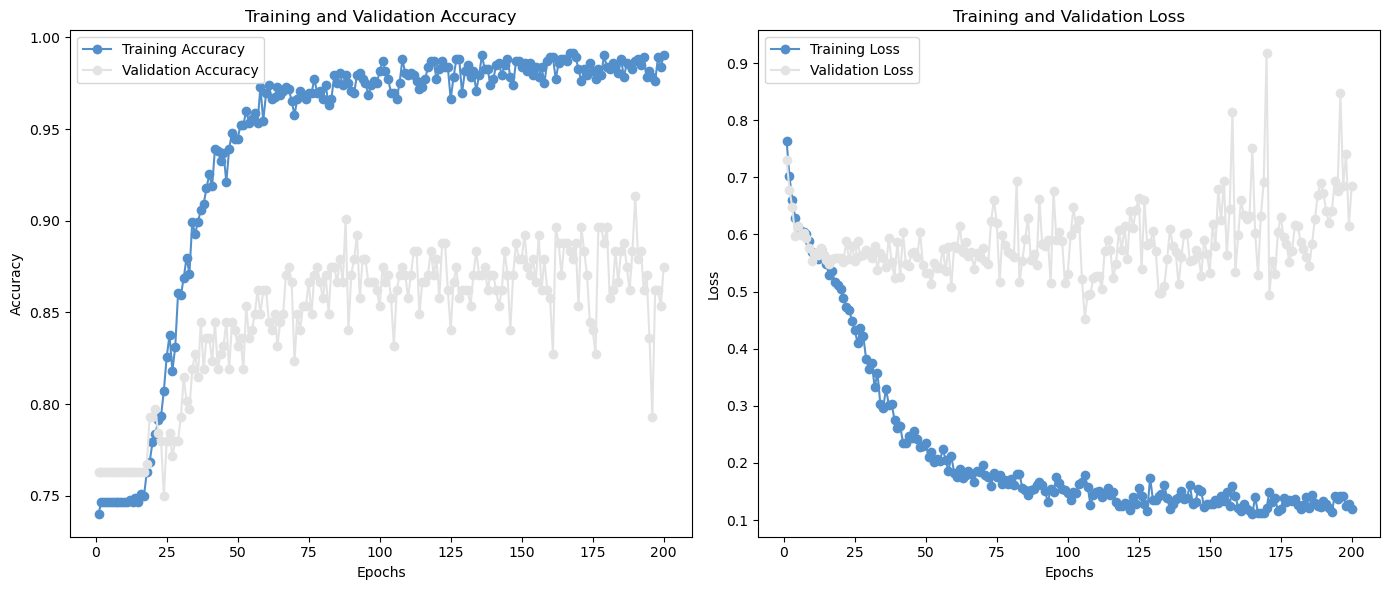

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()

# Extracting the metrics
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy', color='#5390cb')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy', color= '#e3e3e3')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss',color='#5390cb')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss', color= '#e3e3e3')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('best_model2.keras')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize the image to match training size
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (rescale)
    return img_array

# Path to the image you want to classify
img_path = '/Users/Katy/darknet/data/images/test-images/7.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Since the output layer has a sigmoid activation, the prediction will be a probability
# Convert probability to binary classification (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

# Print the result
if predicted_class == 1:
    print("The image is classified as Wally.")
else:
    print("The image is classified as Not Wally.")
    
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The image is classified as Not Wally.
[[0.10824751]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

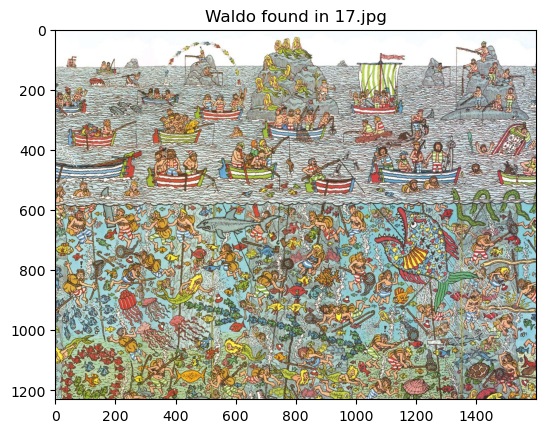

In [58]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the model
#model = ...  # Assume the model is already built and trained

# Function to preprocess image
def preprocess_image(image, target_size=(64, 64)):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

# Function to perform sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Path to original images
original_images_path = '/Users/Katy/darknet/data/images/train-images/train'
image_files = [os.path.join(original_images_path, f) for f in os.listdir(original_images_path) if f.endswith('.jpg')]

# Parameters for sliding window
window_size = (200, 200)
step_size = 32

# # Process each image
# for image_file in image_files:
#     image = cv2.imread(image_file)
#     orig_image = image.copy()
#     boxes = []
#     scores = []

#     for (x, y, window) in sliding_window(image, step_size, window_size):
#         if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
#             continue
        
#         window_image = preprocess_image(window)
#         pred = model.predict(window_image)[0][0]
        
#         if pred > 0.5:  # Threshold for detecting Waldo
#             boxes.append((x, y, x + window_size[0], y + window_size[1]))
#             scores.append(pred)
    
#     # If boxes are detected, select the best one
#     if boxes:
#         max_idx = np.argmax(scores)
#         (startX, startY, endX, endY) = boxes[max_idx]
#         cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo found in {os.path.basename(image_file)}')
#         plt.show()
#     else:
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo not found in {os.path.basename(image_file)}')
#         plt.show()

#image_file = image_files[0]
image_file = "/Users/Katy/darknet/data/images/train-images/train/17.jpg"
image = cv2.imread(image_file)
orig_image = image.copy()
boxes = []
scores = []

for (x, y, window) in sliding_window(image, step_size, window_size):
    #print(window)
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue
        
    window_image = preprocess_image(window)
    pred = model.predict(window_image)[0][0]
        
    if pred > 0.8:  # Threshold for detecting Waldo
        boxes.append((x, y, x + window_size[0], y + window_size[1]))
        scores.append(pred)
    
    # If boxes are detected, select the best one
if boxes:
    max_idx = np.argmax(scores)
    (startX, startY, endX, endY) = boxes[max_idx]
    #cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo found in {os.path.basename(image_file)}')
    plt.show()
else:
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo not found in {os.path.basename(image_file)}')
    plt.show()


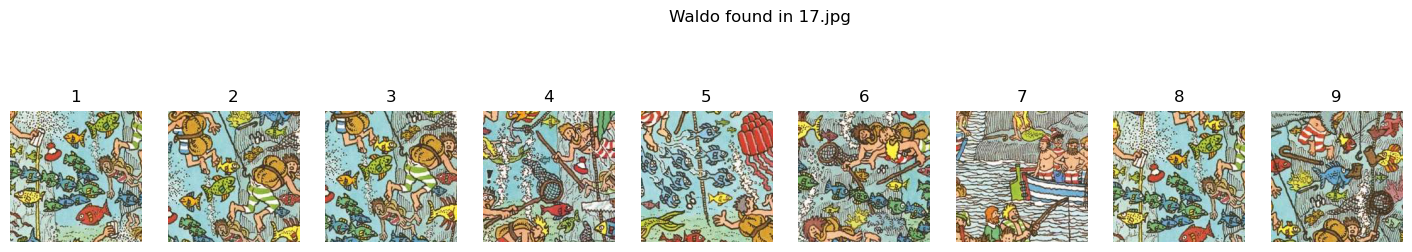

In [59]:
if boxes:
    # Sort boxes by scores in descending order and take the top 50
    top_indices = np.argsort(scores)[-50:][::-1]
    top_boxes = [boxes[i] for i in top_indices]

    # Display the top 50 detected windows
    plt.figure(figsize=(20, 10))
    for i, (startX, startY, endX, endY) in enumerate(top_boxes):
        waldo_window = orig_image[startY:endY, startX:endX]
        plt.subplot(5, 10, i + 1)
        plt.imshow(cv2.cvtColor(waldo_window, cv2.COLOR_BGR2RGB))
        plt.title(f'{i+1}')
        plt.axis('off')
    plt.suptitle(f'Waldo found in {os.path.basename(image_file)}')
    plt.show()

In [14]:
boxes

[(0, 0, 64, 64),
 (256, 0, 320, 64),
 (288, 0, 352, 64),
 (384, 0, 448, 64),
 (416, 0, 480, 64),
 (704, 0, 768, 64),
 (768, 0, 832, 64),
 (1216, 0, 1280, 64),
 (1408, 0, 1472, 64),
 (1440, 0, 1504, 64),
 (1472, 0, 1536, 64),
 (1504, 0, 1568, 64),
 (1728, 0, 1792, 64),
 (1760, 0, 1824, 64),
 (1824, 0, 1888, 64),
 (1888, 0, 1952, 64),
 (1952, 0, 2016, 64),
 (96, 32, 160, 96),
 (128, 32, 192, 96),
 (160, 32, 224, 96),
 (384, 32, 448, 96),
 (800, 32, 864, 96),
 (864, 32, 928, 96),
 (896, 32, 960, 96),
 (1088, 32, 1152, 96),
 (1312, 32, 1376, 96),
 (1472, 32, 1536, 96),
 (1664, 32, 1728, 96),
 (1696, 32, 1760, 96),
 (1728, 32, 1792, 96),
 (1760, 32, 1824, 96),
 (224, 64, 288, 128),
 (256, 64, 320, 128),
 (384, 64, 448, 128),
 (544, 64, 608, 128),
 (768, 64, 832, 128),
 (800, 64, 864, 128),
 (832, 64, 896, 128),
 (896, 64, 960, 128),
 (960, 64, 1024, 128),
 (1184, 64, 1248, 128),
 (1216, 64, 1280, 128),
 (1856, 64, 1920, 128),
 (448, 96, 512, 160),
 (480, 96, 544, 160),
 (672, 96, 736, 160),

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Model Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

# Print model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


/Users/Katy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,753 (1.22 MB)

 Trainable params: 318,753 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### this model uses the modified waldo images, but is doing something wrong

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import Sequence
import numpy as np
import os
from sklearn.utils import shuffle as sk_shuffle

# Custom Data Generator for undersampling
class BalancedDataGenerator(Sequence):
    def __init__(self, datagen, directory, target_size=(64, 64), batch_size=32, subset='training', shuffle=True):
        self.datagen = datagen
        self.directory = directory
        self.target_size = target_size
        self.batch_size = batch_size
        self.subset = subset
        self.shuffle = shuffle
        
        self.class_indices = datagen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='binary',
            subset=subset
        ).class_indices
        
        self.waldo_files = []
        self.notwaldo_files = []
        
        for class_label in self.class_indices.keys():
            class_dir = os.path.join(directory, class_label)
            files = [os.path.join(class_dir, file) for file in os.listdir(class_dir)]
            if class_label == 'waldo':
                self.waldo_files.extend(files)
            else:
                self.notwaldo_files.extend(files)
        
        self.waldo_count = len(self.waldo_files)
        self.notwaldo_files = sk_shuffle(self.notwaldo_files)[:self.waldo_count]
        
        self.total_files = self.waldo_files + self.notwaldo_files
        if self.shuffle:
            self.total_files = sk_shuffle(self.total_files)
        
    def __len__(self):
        return len(self.total_files) // self.batch_size
    
    def __getitem__(self, index):
        batch_files = self.total_files[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = []
        batch_labels = []
        
        for file in batch_files:
            image = tf.keras.preprocessing.image.load_img(file, target_size=self.target_size)
            image = tf.keras.preprocessing.image.img_to_array(image)
            image = self.datagen.random_transform(image)
            image = self.datagen.standardize(image)
            
            if 'waldo' in file:
                label = 1
            else:
                label = 0
                
            batch_images.append(image)
            batch_labels.append(label)
        
        return np.array(batch_images), np.array(batch_labels)
    
    def on_epoch_end(self):
        if self.shuffle:
            self.total_files = sk_shuffle(self.total_files)

# Directories
base_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Balanced Data Generators
train_generator = BalancedDataGenerator(
    datagen=train_datagen,
    directory=base_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training'
)

validation_generator = BalancedDataGenerator(
    datagen=train_datagen,
    directory=base_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation'
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Wally or not
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=3  # Adjust the number of epochs based on your data
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


Found 4302 images belonging to 2 classes.
Found 1074 images belonging to 2 classes.
Epoch 1/3
2/2 [==============================] - 3s 766ms/step - loss: 0.4885 - accuracy: 0.6875 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 1s 402ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 1.1546e-04 - val_accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 0s 89ms/step - loss: 2.3509e-08 - accuracy: 1.0000
Test accuracy: 1.00


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('wally_notwally_model.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize the image to match training size
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (rescale)
    return img_array

# Path to the image you want to classify
img_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images/49.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Since the output layer has a sigmoid activation, the prediction will be a probability
# Convert probability to binary classification (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

# Print the result
if predicted_class == 1:
    print("The image is classified as Wally.")
else:
    print("The image is classified as Not Wally.")
    
print(prediction)


1/1 [==============================] - 0s 229ms/step
The image is classified as Wally.
[[0.9999943]]


1/1 [==============================] - 0s 40ms/step


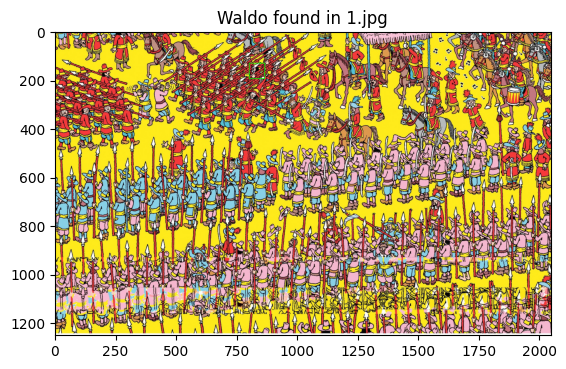

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the model
#model = ...  # Assume the model is already built and trained

# Function to preprocess image
def preprocess_image(image, target_size=(64, 64)):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

# Function to perform sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Path to original images
original_images_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images'
image_files = [os.path.join(original_images_path, f) for f in os.listdir(original_images_path) if f.endswith('.jpg')]

# Parameters for sliding window
window_size = (64, 64)
step_size = 32

# # Process each image
# for image_file in image_files:
#     image = cv2.imread(image_file)
#     orig_image = image.copy()
#     boxes = []
#     scores = []

#     for (x, y, window) in sliding_window(image, step_size, window_size):
#         if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
#             continue
        
#         window_image = preprocess_image(window)
#         pred = model.predict(window_image)[0][0]
        
#         if pred > 0.5:  # Threshold for detecting Waldo
#             boxes.append((x, y, x + window_size[0], y + window_size[1]))
#             scores.append(pred)
    
#     # If boxes are detected, select the best one
#     if boxes:
#         max_idx = np.argmax(scores)
#         (startX, startY, endX, endY) = boxes[max_idx]
#         cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo found in {os.path.basename(image_file)}')
#         plt.show()
#     else:
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo not found in {os.path.basename(image_file)}')
#         plt.show()

image_file = image_files[1]
image = cv2.imread(image_file)
orig_image = image.copy()
boxes = []
scores = []

for (x, y, window) in sliding_window(image, step_size, window_size):
    #print(window)
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue
        
    window_image = preprocess_image(window)
    pred = model.predict(window_image)[0][0]
        
    if pred > 0.5:  # Threshold for detecting Waldo
        boxes.append((x, y, x + window_size[0], y + window_size[1]))
        scores.append(pred)
    
    # If boxes are detected, select the best one
if boxes:
    max_idx = np.argmax(scores)
    (startX, startY, endX, endY) = boxes[max_idx]
    cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo found in {os.path.basename(image_file)}')
    plt.show()
else:
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo not found in {os.path.basename(image_file)}')
    plt.show()


1/1 [==============================] - 0s 90ms/step
Waldo detected in window: x=0, y=0, width=64, height=64
1/1 [==============================] - 0s 67ms/step
Waldo detected in window: x=32, y=0, width=64, height=64
1/1 [==============================] - 0s 79ms/step
Waldo detected in window: x=64, y=0, width=64, height=64
1/1 [==============================] - 0s 85ms/step
Waldo detected in window: x=96, y=0, width=64, height=64
1/1 [==============================] - 0s 55ms/step
Waldo detected in window: x=192, y=0, width=64, height=64
1/1 [==============================] - 0s 61ms/step
Waldo detected in window: x=224, y=0, width=64, height=64
1/1 [==============================] - 0s 55ms/step
Waldo detected in window: x=256, y=0, width=64, height=64
1/1 [==============================] - 0s 38ms/step
Waldo detected in window: x=288, y=0, width=64, height=64
1/1 [==============================] - 0s 42ms/step
Waldo detected in window: x=320, y=0, width=64, height=64
1/1 [==========

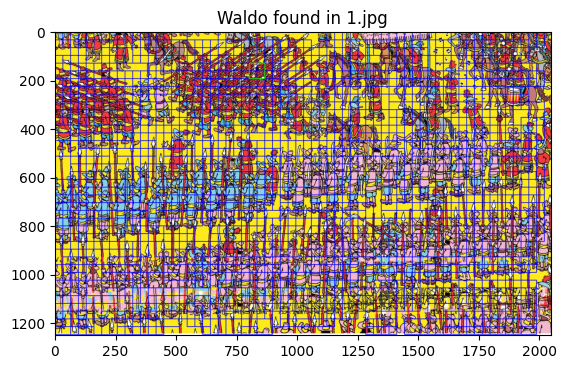

In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the model
# model = ...  # Assume the model is already built and trained

# Function to preprocess image
def preprocess_image(image, target_size=(64, 64)):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

# Function to perform sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Path to original images
original_images_path = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/original-images'
image_files = [os.path.join(original_images_path, f) for f in os.listdir(original_images_path) if f.endswith('.jpg')]

# Parameters for sliding window
window_size = (64, 64)
step_size = 32

# Process each image
# for image_file in image_files:
#     image = cv2.imread(image_file)
#     orig_image = image.copy()
#     boxes = []
#     scores = []

#     for (x, y, window) in sliding_window(image, step_size, window_size):
#         if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
#             continue
        
#         window_image = preprocess_image(window)
#         pred = model.predict(window_image)[0][0]
        
#         if pred > 0.5:  # Threshold for detecting Waldo
#             boxes.append((x, y, x + window_size[0], y + window_size[1]))
#             scores.append(pred)
#             # Print the coordinates of the detected window
#             print(f'Waldo detected in window: x={x}, y={y}, width={window_size[0]}, height={window_size[1]}')
#             cv2.rectangle(orig_image, (x, y), (x + window_size[0], y + window_size[1]), (255, 0, 0), 2)
    
#     # If boxes are detected, select the best one
#     if boxes:
#         max_idx = np.argmax(scores)
#         (startX, startY, endX, endY) = boxes[max_idx]
#         cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo found in {os.path.basename(image_file)}')
#         plt.show()
#     else:
#         plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
#         plt.title(f'Waldo not found in {os.path.basename(image_file)}')
#         plt.show()
        
image_file = image_files[0]
image = cv2.imread(image_file)
orig_image = image.copy()
boxes = []
scores = []

for (x, y, window) in sliding_window(image, step_size, window_size):
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue
        
    window_image = preprocess_image(window)
    pred = model.predict(window_image)[0][0]
        
    if pred > 0.5:  # Threshold for detecting Waldo
        boxes.append((x, y, x + window_size[0], y + window_size[1]))
        scores.append(pred)
        # Print the coordinates of the detected window
        print(f'Waldo detected in window: x={x}, y={y}, width={window_size[0]}, height={window_size[1]}')
        cv2.rectangle(orig_image, (x, y), (x + window_size[0], y + window_size[1]), (255, 0, 0), 2)
    
# If boxes are detected, select the best one
if boxes:
    max_idx = np.argmax(scores)
    (startX, startY, endX, endY) = boxes[max_idx]
    cv2.rectangle(orig_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo found in {os.path.basename(image_file)}')
    plt.show()
else:
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Waldo not found in {os.path.basename(image_file)}')
    plt.show()


In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Directories
waldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64/waldo'
notwaldo_dir = 'C:/Users/josel/Downloads/wheres-waldo/wheres-waldo/Hey-Waldo/64/notwaldo'

# Function to load and preprocess images
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = image.load_img(img_path, target_size=(64, 64))  # Resize the image
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load and preprocess images
waldo_images, waldo_labels = load_images_from_directory(waldo_dir, 1)
notwaldo_images, notwaldo_labels = load_images_from_directory(notwaldo_dir, 0)

# Combine and convert to numpy arrays
waldo_images = np.array(waldo_images)
waldo_labels = np.array(waldo_labels)
notwaldo_images = np.array(notwaldo_images)
notwaldo_labels = np.array(notwaldo_labels)

# Balance the dataset by undersampling the not Wally category
# Determine the number of Wally images
n_waldo = len(waldo_images)

# Undersample the Not Wally images
notwaldo_images_resampled, notwaldo_labels_resampled = resample(
    notwaldo_images,
    notwaldo_labels,
    replace=False,  # Do not sample with replacement
    n_samples=n_waldo,  # Match the number of Wally images
    random_state=42
)

# Combine the balanced dataset
all_images = np.concatenate((waldo_images, notwaldo_images_resampled))
all_labels = np.concatenate((waldo_labels, notwaldo_labels_resampled))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# No augmentation for validation data, only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Model Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Wally or not
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=100,  # Reduce the number of epochs if overfitting persists
    callbacks=[early_stopping]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Save the Model
model.save('wally_notwally_model.h5')


Epoch 1/100
2/2 [==============================] - 4s 720ms/step - loss: 0.9289 - accuracy: 0.4194 - val_loss: 0.9092 - val_accuracy: 0.5625
Epoch 2/100
2/2 [==============================] - 1s 323ms/step - loss: 0.9025 - accuracy: 0.5645 - val_loss: 0.8852 - val_accuracy: 0.4375
Epoch 3/100
2/2 [==============================] - 1s 339ms/step - loss: 0.8791 - accuracy: 0.5484 - val_loss: 0.8635 - val_accuracy: 0.4375
Epoch 4/100
2/2 [==============================] - 1s 327ms/step - loss: 0.8570 - accuracy: 0.5161 - val_loss: 0.8437 - val_accuracy: 0.4375
Epoch 5/100
2/2 [==============================] - 1s 308ms/step - loss: 0.8369 - accuracy: 0.5000 - val_loss: 0.8262 - val_accuracy: 0.4375
Epoch 6/100
2/2 [==============================] - 1s 258ms/step - loss: 0.8204 - accuracy: 0.5000 - val_loss: 0.8106 - val_accuracy: 0.4375
Epoch 7/100
2/2 [==============================] - 0s 213ms/step - loss: 0.8047 - accuracy: 0.5000 - val_loss: 0.7970 - val_accuracy: 0.4375
Epoch 8/100
2

c:\Users\josel\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
